# Medical Insurance Cost Prediction

-----------------------------------------------------------------------------------------------------------------------------

#### Project Workflow:

Step 1 : Getting data 

Step 2 : Analyzing Data

Step 3 : Transforming Data

Step 4 : Splitting Data

Step 5 : Training models

Step 6 : Prediction for test Data

Step 7 : Export Predictions as csv



---------------------------------------------------------------------------------------------------------------------

#### Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Getting Data

In [56]:
data = pd.read_csv('insurance.csv') #importing CSV File
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Basic Analysis of data

In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.isnull().sum() #checking null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.describe() #statistical Description

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The huge difference between Max *CHARGES* and 75th Percentile of charges is representing the presence of outliers here.

Let's Confirm these outliers using **BOXPLOT.**

F:\DS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

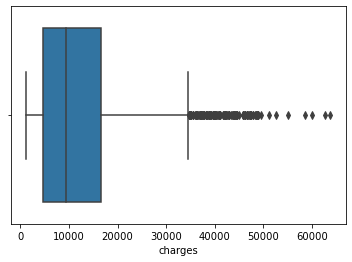

In [17]:
sns.boxplot(data.charges) #plotting Boxplot

Yes we have confirmed the presence of outliers but in this perticular case we won't be removing this outlier.

As we can have very High cost for few patients having certain kind of issue.

e.g. It may be the case that the patient is smoker and his/her age is also greater than 65 in such cases it is obvious to get high value of medical insurance cost

In [49]:
clean_up = {'sex':{'male':1,'female':0}, 'smoker':{'yes':1,'no':0}, 'region':{'southwest':1,'southeast':2,'northwest':3,'northeast':4}}

We are Replacing categorical features with numerical values

In [74]:
data = data.replace(clean_up)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [113]:
x = data.drop(['charges'],axis = 1)
y = data.charges

#### Splitting Data

In [51]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10, random_state = 100) 
#80% data for training and 10% for testing

#### Creating model and Training data

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
reg = LinearRegression()

In [77]:
reg.fit(x_train,y_train)

LinearRegression()

In [88]:
test_prediction = reg.predict(x_test)

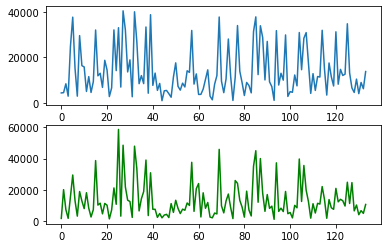

In [93]:
#comparing predicted and actual charges for test data
plt.subplot(2,1,1)
plt.plot(test_prediction)
plt.subplot(2,1,2)
plt.plot(np.array(y_test),'g')

In [94]:
reg.score(x_test,y_test)

0.7075793505751147

In [106]:
x_test['Predicted Charges'] = test_prediction

<ipython-input-106-9b3fd110f387>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Predicted Charges'] = test_prediction


In [111]:
x_test.shape

(134, 7)

In [112]:
x_test.to_csv('predictions.csv')